## Milestone 2 - Cleaning/Formatting Flat File Source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
cities_df = pd.read_csv("worldcities.csv")
cities_df.head()

,city,city_ascii,lat,lon,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [3]:
# Step 1: Sort by city
cities_df_sorted = cities_df.sort_values(by=['city'])
cities_df_sorted.head()

,city,city_ascii,lat,lon,country,iso2,iso3,admin_name,capital,population,id
1746,A Coruña,A Coruna,43.3713,-8.4188,Spain,ES,ESP,Galicia,minor,370610.0,1724417375
2400,Aachen,Aachen,50.7762,6.0838,Germany,DE,DEU,North Rhine-Westphalia,minor,247380.0,1276805572
29829,Aadorf,Aadorf,47.4939,8.8975,Switzerland,CH,CHE,Thurgau,NaN,9036.0,1756022542
4077,Aalborg,Aalborg,57.0337,9.9166,Denmark,DK,DNK,Nordjylland,admin,122219.0,1208789278
11447,Aalen,Aalen,48.8372,10.0936,Germany,DE,DEU,Baden-Württemberg,minor,68456.0,1276757787


In [4]:
# Step 2: Check if city_ascii is a duplicate of city
values_match = (cities_df['city'] == cities_df['city_ascii']).all()
values_match

False

They're don't have the same values hence we will keep both

In [5]:
# Step 3: Rename Headers
new_headers = ['City', 'City ASCII', 'lat', 'lon', 'Country', 'ISO2', 'ISO3', 'Admin Name', 'Capital', 'Population', 'ID']
cities_df.columns = new_headers
cities_df.head()

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [6]:
# Step 4: Format population into a more readable format by adding commas
cities_df['Population'] = cities_df['Population'].apply(lambda x: "{:,.0f}".format(x))
cities_df.head()

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,"37,977,000",1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,"34,540,000",1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,"29,617,000",1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,"23,355,000",1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,"23,088,000",1608618140


In [7]:
# Step 5:Check if population column has any negative values (bad data)
outliers = cities_df[cities_df['Population'].str.replace(',', '').astype(float) <0] # also changing the data type to float
outliers

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID


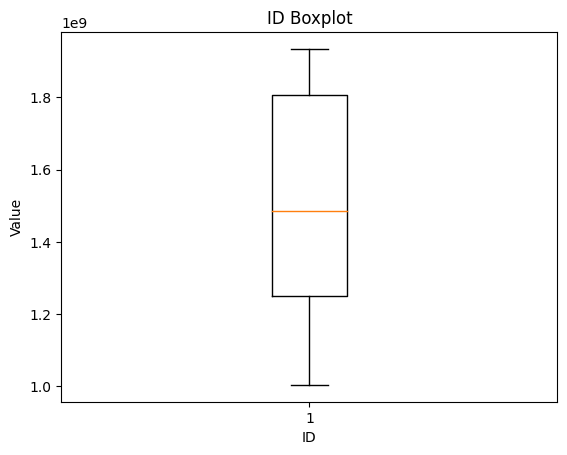

In [8]:
#  Step 6: Identify outliers on ID column
plt.boxplot(cities_df['ID'])
plt.xlabel('ID')
plt.ylabel('Value')
plt.title('ID Boxplot')
plt.show()

There are no outliers in ID 

In [9]:
# Step 7: Find duplicates
duplicates = cities_df[cities_df.duplicated()]
duplicates

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID


There are no duplicates in the dataset

In [10]:
# Step 8: Check Missing Values
cities_df.isnull()

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
40996,False,False,False,False,False,False,False,False,True,False,False
40997,False,False,False,False,False,False,False,False,True,False,False
40998,False,False,False,False,False,False,False,False,True,False,False
40999,False,False,False,False,False,False,False,False,True,False,False


In [11]:
# Step 9: Scale lat and lon
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['lat', 'lon']

# Fit the scaler on the selected columns
cities_df[columns_to_scale] = scaler.fit_transform(cities_df[columns_to_scale])
cities_df[columns_to_scale] # Display scaled lat and lon

,lat,lon
0,0.203358,2.093137
1,-1.579454,1.615418
2,-0.095720,1.184704
3,-0.508119,1.120760
4,-0.693900,1.821040
...,...,...
40996,1.125615,2.090342
40997,1.393635,1.098944
40998,2.161565,-0.197386
40999,1.345415,-0.552495


In [12]:
# Step 10: Fuzzy Matching
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Prompt user to input a city
target_city = input("Please insert a city: ")

# List of cities for matching
city_names = cities_df['City'].tolist()

# Find the best match to the target city
best_match, score = process.extractOne(target_city, city_names)

print(f"The best match for '{target_city}' is '{best_match}' with a similarity score of {score}%")


Please insert a city:  jap


The best match for 'jap' is 'Rājapālaiyam' with a similarity score of 90%


The fuzzy matching takes a city from the user and checks for the best match and the match score. Then displays the result to the user.

# Milestone 3

In [13]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, pi
import re
from scipy import stats
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [14]:
with open("Cities by Latitude & Longitude.html", "r", encoding="utf8") as fd:
    soup = BeautifulSoup(fd, "html.parser")
    print(type(soup))

<class 'bs4.BeautifulSoup'>


In [15]:
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0043)https://batchgeo.com/map/latitude-longitude -->
<html lang="en" xml:lang="en" xmlns="//www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <style>
   .ssQIHO-checkbox-menu-item>span>span{background-color:#000;display:inline-block}@media (forced-colors:active),(prefers-contrast:more){.ssQIHO-checkbox-menu-item>span>span{background-color:ButtonText}}
  </style>
  <style>
   .gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}.gm-style .gm-style-mtc ul,.gm-style .gm-style-mtc li{-webkit-box-sizing:border-box;box-sizing:border-box}sentinel{}
  </style>
  <style>
   .LGLeeN-keyboard-shortcuts-view{display:-webkit-box;display:-webkit-flex;display:-moz-box;display:-ms-flexbox;display:flex}.LGLeeN-keyboard-shortcuts-view table,.LGLeeN-keyboard-shortcuts-view tbody,.LGLeeN-keyboard-shortcuts-view td,.LGLeeN-keyboard-shortcuts-view tr{background:inherit;border:none;margin:0;paddin

In [16]:
# Step 1: HTML Parsing
table = soup.find("table", class_ ="clusterize-table data-table-width-restrict")
print(table.prettify())

<table class="clusterize-table data-table-width-restrict" style="margin-top: -2px;">
 <thead class="clusterize-thead">
  <tr>
   <th data-position="0">
    City
   </th>
   <th data-position="1">
    Province/State
   </th>
   <th data-position="2">
    Country
   </th>
   <th data-position="3">
    North-South
   </th>
   <th data-position="4">
    East-West
   </th>
   <th data-position="5">
    Coordinates
   </th>
   <th data-position="6">
    Near Latitude
   </th>
   <th data-position="7">
    Near Longitude
   </th>
  </tr>
 </thead>
 <tbody class="clusterize-content" tabindex="0">
  <tr data-id="0">
   <td class="data-table-cell-tooltip" data-position="0" data-text="Adak" data-type="string">
    Adak
   </td>
   <td class="data-table-cell-tooltip" data-position="1" data-text="Alaska" data-type="string">
    Alaska
   </td>
   <td class="data-table-cell-tooltip" data-position="2" data-text="United States" data-type="string">
    United States
   </td>
   <td class="data-table-ce

In [17]:
# Find all the columns
data = table.findAll('tr')
headers = data[0]
headers

<tr><th data-position="0">City</th><th data-position="1">Province/State</th><th data-position="2">Country</th><th data-position="3">North-South</th><th data-position="4">East-West</th><th data-position="5">Coordinates</th><th data-position="6">Near Latitude</th><th data-position="7">Near Longitude</th></tr>

In [18]:
# Get the headers
col_headers = [th.getText() for th in headers.findAll('th')]
# Get rid of unwanted characters
col_headers = [re.sub(r'[^\sa-zA-Z/-]', ' ', item) for item in col_headers]
col_headers = [' '.join(item.split()) for item in col_headers]

col_headers


['City',
 'Province/State',
 'Country',
 'North-South',
 'East-West',
 'Coordinates',
 'Near Latitude',
 'Near Longitude']

In [19]:
# Get the data without the headers
data_without_header = data[1:]
data_without_header

[<tr data-id="0"><td class="data-table-cell-tooltip" data-position="0" data-text="Adak" data-type="string">Adak</td><td class="data-table-cell-tooltip" data-position="1" data-text="Alaska" data-type="string">Alaska</td><td class="data-table-cell-tooltip" data-position="2" data-text="United States" data-type="string">United States</td><td class="data-table-cell-tooltip" data-position="3" data-text="Northern" data-type="string">Northern</td><td class="data-table-cell-tooltip" data-position="4" data-text="Western" data-type="string">Western</td><td class="data-table-cell-tooltip" data-position="5" data-text="51°53′N 176°39′W" data-type="string">51°53′N 176°39′W</td><td class="data-table-cell-tooltip" data-position="6" data-text="50" data-type="number">50</td><td class="data-table-cell-tooltip" data-position="7" data-text="-175" data-type="number">-175</td></tr>,
 <tr data-id="1"><td class="data-table-cell-tooltip" data-position="0" data-text="Honolulu" data-type="string">Honolulu</td><td 

In [20]:
# Get the data as list
df_data = [[td.getText() for td in th.findAll('td')] for th in data_without_header]

df_data

[['Adak',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '51°53′N 176°39′W',
  '50',
  '-175'],
 ['Honolulu',
  'Hawaii',
  'United States',
  'Northern',
  'Western',
  '21°19′N 157°50′W',
  '20',
  '-160'],
 ['Barrow',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '71°18′N 156°46′W',
  '70',
  '-155'],
 ['Hilo',
  'Hawaii',
  'United States',
  'Northern',
  'Western',
  '19°42′N 155°05′W',
  '20',
  '-155'],
 ['Anchorage',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '61°13′N 149°54′W',
  '60',
  '-150'],
 ['Deadhorse',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '70°12′N 148°31′W',
  '70',
  '-150'],
 ['Fairbanks',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '64°51′N 147°43′W',
  '65',
  '-150'],
 ['Sitka',
  'Alaska',
  'United States',
  'Northern',
  'Western',
  '57°03′N 135°20′W',
  '55',
  '-135'],
 ['Whitehorse',
  'Yukon',
  'Canada',
  'Northern',
  'Western',
  '60°43′N 135°03′W',
  '60',
  '-135'],

Now that we have parsed the html and separated the headers and rows, let us create the data frame

In [21]:
# Step 2: creating a data frame
td_data = [row[:] for row in df_data]
web_df = pd.DataFrame(td_data, columns=col_headers)
web_df.head()

,City,Province/State,Country,North-South,East-West,Coordinates,Near Latitude,Near Longitude
0,Adak,Alaska,United States,Northern,Western,51°53′N 176°39′W,50,-175
1,Honolulu,Hawaii,United States,Northern,Western,21°19′N 157°50′W,20,-160
2,Barrow,Alaska,United States,Northern,Western,71°18′N 156°46′W,70,-155
3,Hilo,Hawaii,United States,Northern,Western,19°42′N 155°05′W,20,-155
4,Anchorage,Alaska,United States,Northern,Western,61°13′N 149°54′W,60,-150


In [22]:
# Step 3: Renanme the lat and lon to match it with the flat file and API
renamed_headers = {'Near Latitude' : 'lat', 'Near Longitude' : 'lon'}
web_df = web_df.rename(columns = renamed_headers)

In [23]:
# Step 4: Remove last row
web_df = web_df.iloc[:-1]
web_df.head()

,City,Province/State,Country,North-South,East-West,Coordinates,lat,lon
0,Adak,Alaska,United States,Northern,Western,51°53′N 176°39′W,50,-175
1,Honolulu,Hawaii,United States,Northern,Western,21°19′N 157°50′W,20,-160
2,Barrow,Alaska,United States,Northern,Western,71°18′N 156°46′W,70,-155
3,Hilo,Hawaii,United States,Northern,Western,19°42′N 155°05′W,20,-155
4,Anchorage,Alaska,United States,Northern,Western,61°13′N 149°54′W,60,-150


In [24]:
# Step 5: Check if there are missing data
missing_values = web_df.isna()

if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [25]:
# Step 6: Find duplicates
web_duplicates = web_df[web_df.duplicated()]
web_duplicates

,City,Province/State,Country,North-South,East-West,Coordinates,lat,lon


There are no duplicates in the data frame

In [26]:
# Step 7: Fuzzy Matching

# Prompt user to input a city
target_city = input("Please insert a city: ")

# List of cities for matching
city_names = web_df['City'].tolist()

# Find the best match to the target city
best_match, score = process.extractOne(target_city, city_names)

print(f"The best match for '{target_city}' is '{best_match}' with a similarity score of {score}%")


Please insert a city:  mex


The best match for 'mex' is 'Mexicali' with a similarity score of 90%


The fuzzy matching takes a city from the user and checks for the best match and the match score. Then displays the result to the user.

### ETHICAL CONSIDERATIONS

Ethical considerations are essential to making sure that geographical data from a website is handled responsibly. First and foremost, user privacy must be respected. Geographical coordinates can expose private information about the locations of people or organizations. Any data gathered or shown should be anonymized or aggregated to avoid identifying specific people in order to solve this. Data security is also of utmost importance. Geospatial data must be protected from illegal access and malicious usage with safeguards in place. Secure storage procedures and encryption techniques are part of this. It is also necessary to consider any potential effects on security and safety. Certain areas or people may be at risk if specific coordinates are revealed. As a result, we should carefully consider what information is made available to the public. Transparency and trust-building also depend on open communication with users regarding data usage and the rationale for gathering geographic information. Finally, it is important to be aware of any potential biases in the data. Biases may be caused by historical errors in geographic records or by the methods used to acquire the data. The key to reducing these biases is aiming for inclusion and accuracy in data representation. Overall, ethical data handling procedures are essential for ensuring that geographic data is treated respectfully, responsibly, and in accordance with accepted moral and legal norms.


# Milestone 4

In [27]:
import random
import requests
import pandas as pd

In [28]:
# Read the API key from the file
with open('weather_api_key.txt', 'r') as file:
    api_key = file.read().strip()

# Ensure the API key is not empty
if not api_key:
    raise ValueError("API key is empty. Please make sure to provide a valid API key in the 'api_key.txt' file.")


In [29]:
# Sample Cities
cities = [
    'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 
    'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville', 
    'San Francisco', 'Indianapolis', 'Columbus', 'Fort Worth', 'Charlotte', 
    'Seattle', 'Denver', 'Washington, D.C.', 'London', 'Birmingham', 'Manchester', 'Glasgow', 'Liverpool', 'Edinburgh', 
    'Leeds', 'Bristol', 'Sheffield', 'Newcastle upon Tyne', 'Nottingham', 
    'Southampton', 'Leicester', 'Coventry', 'Belfast', 'Cardiff', 'Bradford', 
    'Stoke-on-Trent', 'Wolverhampton', 'Plymouth'
]
# Initialize an empty list to store the responses
responses = []

# Step 1: Loop through the list of cities
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}'
    response = requests.get(url)
    json_data = response.json()
    responses.append(json_data)

# Initialize an empty list to store DataFrames
dfs = []

In [30]:
# Step 2: Loop through the responses and get change the response to a readable format

for response in responses:
       
    # Extract the 'main' key
    main_data = response.get('main', {})
    
    # Create a DataFrame with useful data
    df_main = pd.json_normalize(main_data)
    df_main['Lat'] = json_data['coord']['lat']
    df_main['Lon'] = json_data['coord']['lon']
    df_main['Country'] = json_data['sys']['country']    
    df_main['City'] = response.get('name', '')
    df_main['ID'] = response.get('id', '')

    # Append the DataFrame to the list
    dfs.append(df_main)

# Concatenate all DataFrames into one
final_df = pd.concat(dfs, ignore_index=True)

# Print the data frame
print("Today's weather data for the cities are: \n\n\n", final_df)


Today's weather data for the cities are: 


      temp  feels_like  temp_min  temp_max  pressure  humidity      Lat  \
0   50.49       47.86     47.08     52.97      1019        56  41.8334   
1   74.55       72.79     67.01     81.59      1018        23  41.8334   
2   42.21       40.86     40.32     43.38      1026        59  41.8334   
3   57.63       57.33     56.08     59.14      1016        90  41.8334   
4   76.06       74.12     73.26     78.62      1013        16  41.8334   
5   45.50       44.58     43.57     47.48      1019        87  41.8334   
6   58.89       58.39     56.26     61.52       995        83  41.8334   
7   75.18       73.62     66.22     83.48      1015        26  41.8334   
8   61.41       60.69     59.49     63.34      1021        73  41.8334   
9   68.77       66.96     63.81     71.87      1018        34  41.8334   
10  56.68       56.37     54.97     58.12      1025        92  41.8334   
11  79.63       79.63     74.98     84.42      1016        72  41.8

In [31]:
# Step 3: Rename headers

final_df = final_df.rename(columns={
    'temp': 'Temperature (F)',
    'feels_like': 'Feels Like (F)',
    'temp_min': 'Min Temperature (F)',
    'temp_max': 'Max Temperature (F)',
    'pressure': 'Pressure (hPa)',
    'humidity': 'Humidity (%)',
})

# Print the modified DataFrame
final_df.head()


,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%),Lat,Lon,Country,City,ID,sea_level,grnd_level
0,50.49,47.86,47.08,52.97,1019,56,41.8334,-70.8328,US,New York,5128581,NaN,NaN
1,74.55,72.79,67.01,81.59,1018,23,41.8334,-70.8328,US,Los Angeles,5368361,NaN,NaN
2,42.21,40.86,40.32,43.38,1026,59,41.8334,-70.8328,US,Chicago,4887398,NaN,NaN
3,57.63,57.33,56.08,59.14,1016,90,41.8334,-70.8328,US,Houston,4699066,NaN,NaN
4,76.06,74.12,73.26,78.62,1013,16,41.8334,-70.8328,US,Phoenix,5308655,NaN,NaN


In [32]:
 # Step 4: Rearrange and select necessary columns
final_df = final_df[['City','Country', 'Lat', 'Lon', 'Temperature (F)', 'Feels Like (F)',
                     'Min Temperature (F)', 'Max Temperature (F)', 'Pressure (hPa)', 'Humidity (%)']]
# Print the modified DataFrame
final_df.head()

,City,Country,Lat,Lon,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%)
0,New York,US,41.8334,-70.8328,50.49,47.86,47.08,52.97,1019,56
1,Los Angeles,US,41.8334,-70.8328,74.55,72.79,67.01,81.59,1018,23
2,Chicago,US,41.8334,-70.8328,42.21,40.86,40.32,43.38,1026,59
3,Houston,US,41.8334,-70.8328,57.63,57.33,56.08,59.14,1016,90
4,Phoenix,US,41.8334,-70.8328,76.06,74.12,73.26,78.62,1013,16


In [33]:
# Step 5: Check if there are missing data
api_missing_values = final_df.isna()

if api_missing_values.any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [34]:
# Step 6: Find duplicates
api_duplicates = final_df[final_df.duplicated()]
api_duplicates

,City,Country,Lat,Lon,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%)


## Ethical Implications

Data wrangling, particularly with weather APIs, raises pertinent ethical considerations. Firstly, it's crucial to respect users' privacy and ensure their consent when collecting location-specific data. Handling large datasets also demands responsible resource management, as API calls can strain servers and potentially lead to service disruptions. Moreover, the accuracy and reliability of weather data must be maintained to avoid misinformation, which can have serious consequences for individuals and industries that rely on precise forecasts. Ensuring data security is paramount, as sensitive information could be inadvertently exposed during the wrangling process. Transparency in data sourcing and transformations is equally important, allowing for scrutiny and reproducibility, thus fostering trust within the data community and end-users. Lastly, it's imperative to consider the environmental impact of data wrangling, given the computational resources required for processing large datasets, advocating for sustainable practices in data handling and storage.

## Steps completed

The process begins by first retrieving and validating the API key stored in a file, which serves as the authentication for accessing the OpenWeatherMap API. Next, we have provided a default list of cities for now.This step will be dynamic by prompting the user to enter the cities they want. The code then systematically loops through this list, sending API requests to gather weather data for each city. During this process, the received data is converted from its initial format into a more structured and comprehensible DataFrame. Each resulting DataFrame is then added to a collection. Once all the data is organized in DataFrame format, headers are adjusted to enhance clarity and ensure uniformity. Additionally, the arrangement of columns within the DataFrame is optimized to align with the desired output format. An evaluation is conducted to confirm the presence of complete information without any missing values. Moreover, the code identifies any duplicate entries, to uphold the integrity of the dataset. This thorough series of steps collectively constitutes a comprehensive data wrangling process, preparing the data for further analysis or presentation.




# Milestone 5

In [35]:
import sqlite3
import seaborn as sns

# Connect to the SQLite database (create one if it doesn't exist)
conn = sqlite3.connect('merged_data.db')

# Load cleaned datasets as tables
web_df.to_sql('cities', conn, if_exists='replace', index=False)
cities_df.to_sql('flatfile', conn, if_exists='replace', index=False)
final_df.to_sql('openweather', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


In [36]:
# Reconnect to the SQLite database
conn = sqlite3.connect('merged_data.db')

# Perform SQL join to merge the datasets
query = '''
    SELECT *
    FROM cities
    JOIN flatfile ON cities.city = flatfile.city
    JOIN openweather ON cities.city = openweather.city
'''
merged_data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


In [37]:
merged_data.head()

,City,Province/State,Country,North-South,East-West,Coordinates,lat,lon,City,City ASCII,...,City,Country,Lat,Lon,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%)
0,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
1,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
2,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
3,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
4,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51


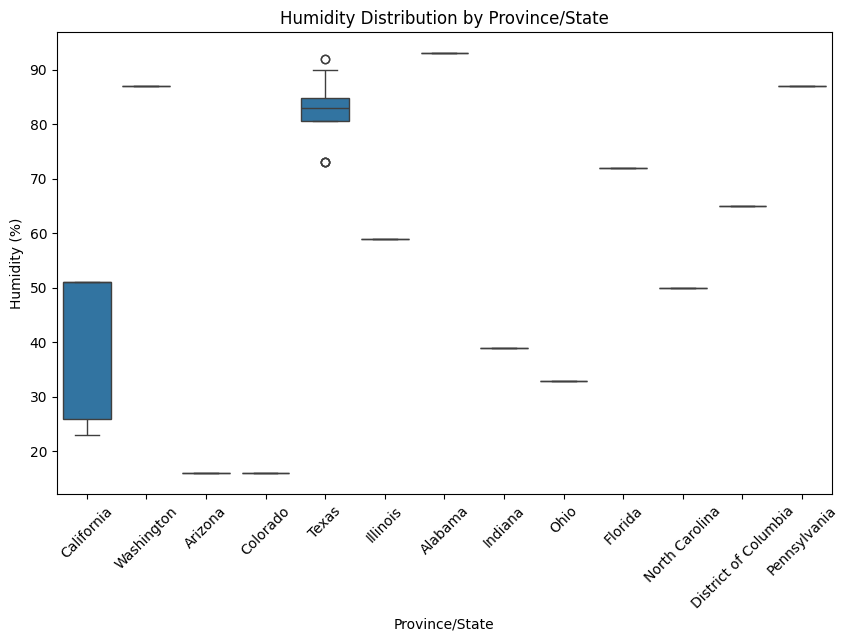

In [38]:
# Humidity Distribution by Province/State

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['Province/State'], y=merged_data['Humidity (%)'])
plt.xlabel('Province/State')
plt.ylabel('Humidity (%)')
plt.title('Humidity Distribution by Province/State')
plt.xticks(rotation=45)
plt.show()


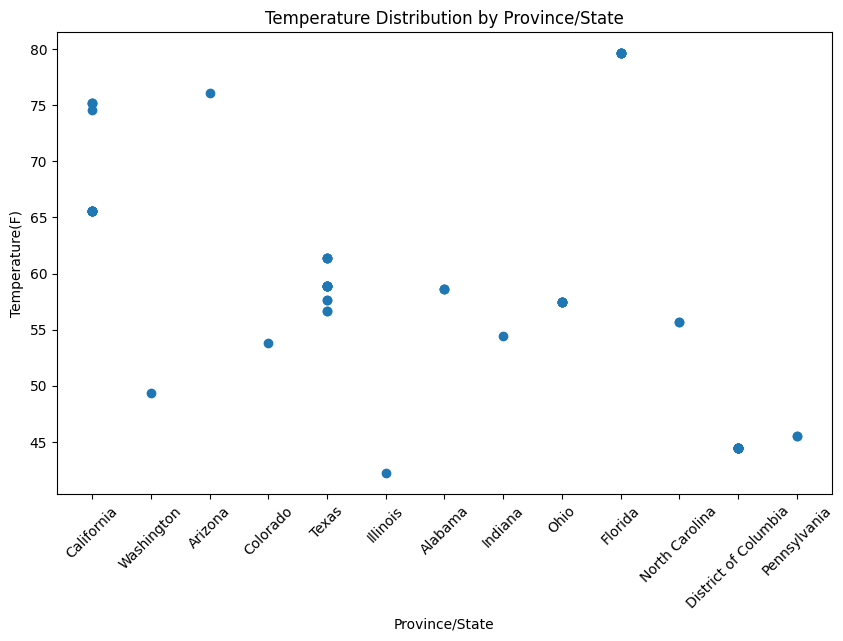

In [39]:
# Scatter plot - Temperature distribution by province/state

plt.figure(figsize=(10, 6))
plt.scatter(x=merged_data['Province/State'], y=merged_data['Temperature (F)'])
plt.xlabel('Province/State')
plt.ylabel('Temperature(F)')
plt.title('Temperature Distribution by Province/State')
plt.xticks(rotation=45)
plt.show()


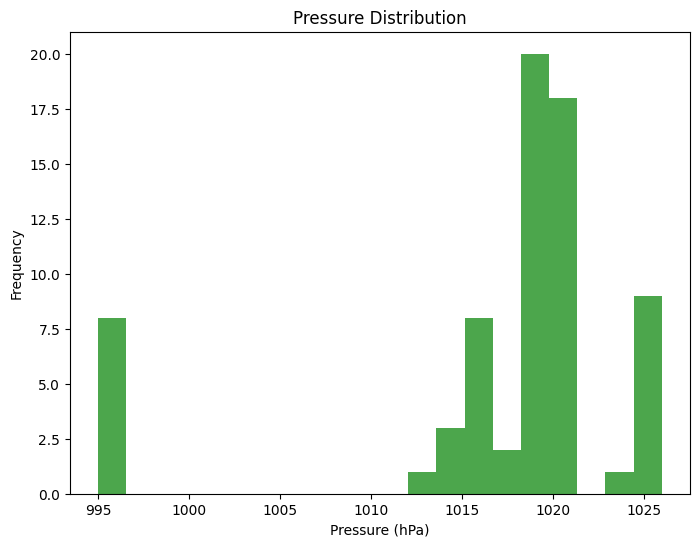

In [40]:
# Histogram - Pressure Distribution
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Pressure (hPa)'], bins=20, color='green', alpha=0.7)
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.title('Pressure Distribution')
plt.show()


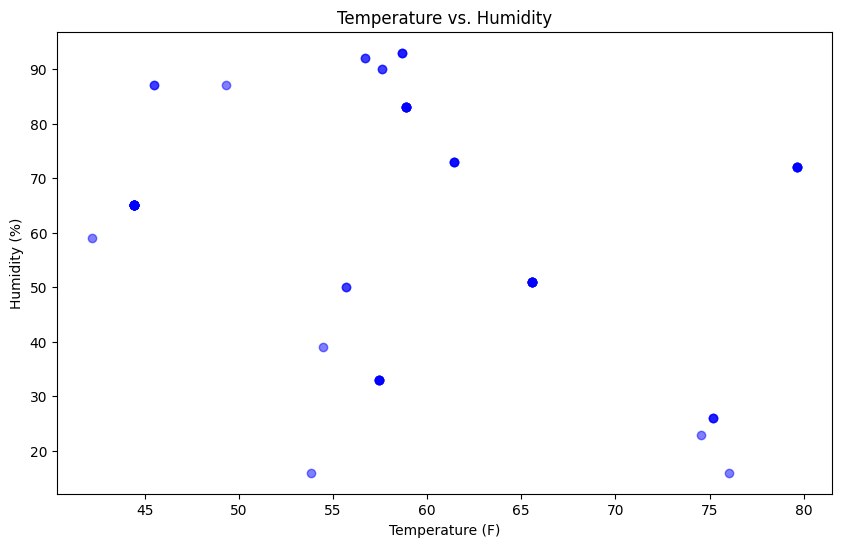

In [41]:
# Scatter Plot - Temperature vs. Humidity

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Temperature (F)'], merged_data['Humidity (%)'], c='blue', alpha=0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.show()


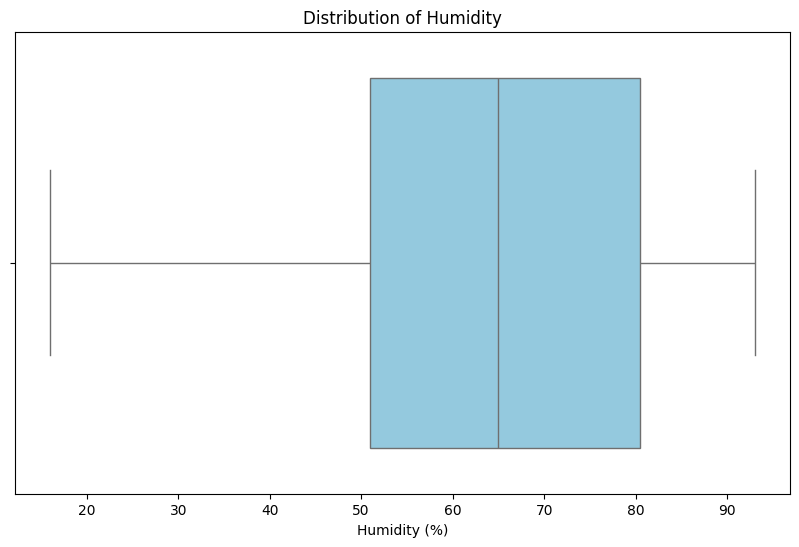

In [42]:
# Box Plot - Distribution of Humidity

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['Humidity (%)'], color='skyblue')
plt.xlabel('Humidity (%)')
plt.title('Distribution of Humidity')
plt.show()


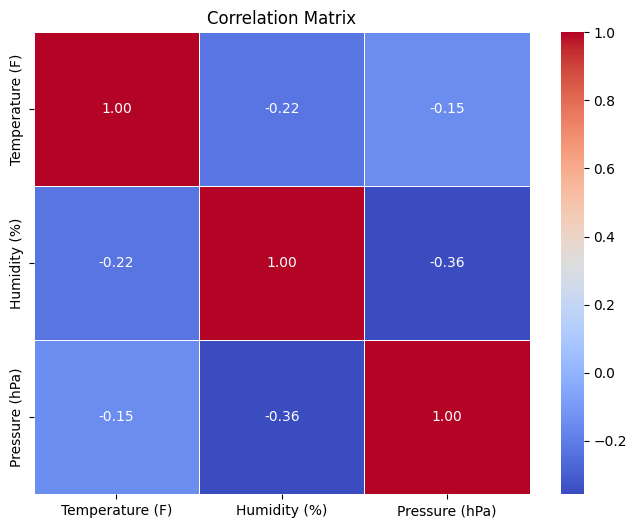

In [43]:
# Heatmap - Correlation Matrix:
correlation_matrix = merged_data[['Temperature (F)', 'Humidity (%)', 'Pressure (hPa)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


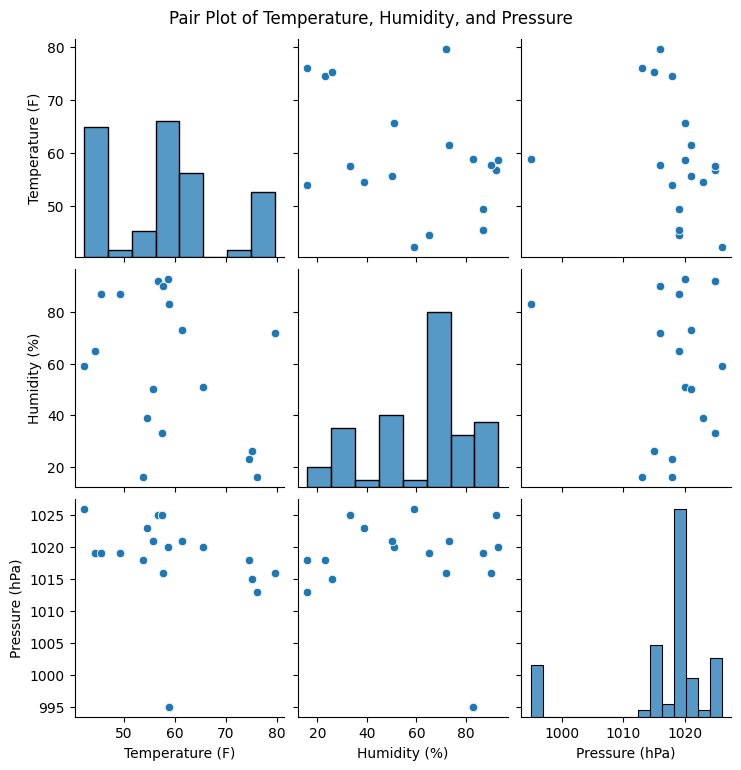

In [44]:
# Pair Plot - Relationship Between Numerical Variables:
sns.pairplot(merged_data[['Temperature (F)', 'Humidity (%)', 'Pressure (hPa)']])
plt.suptitle('Pair Plot of Temperature, Humidity, and Pressure', y=1.02)
plt.show()


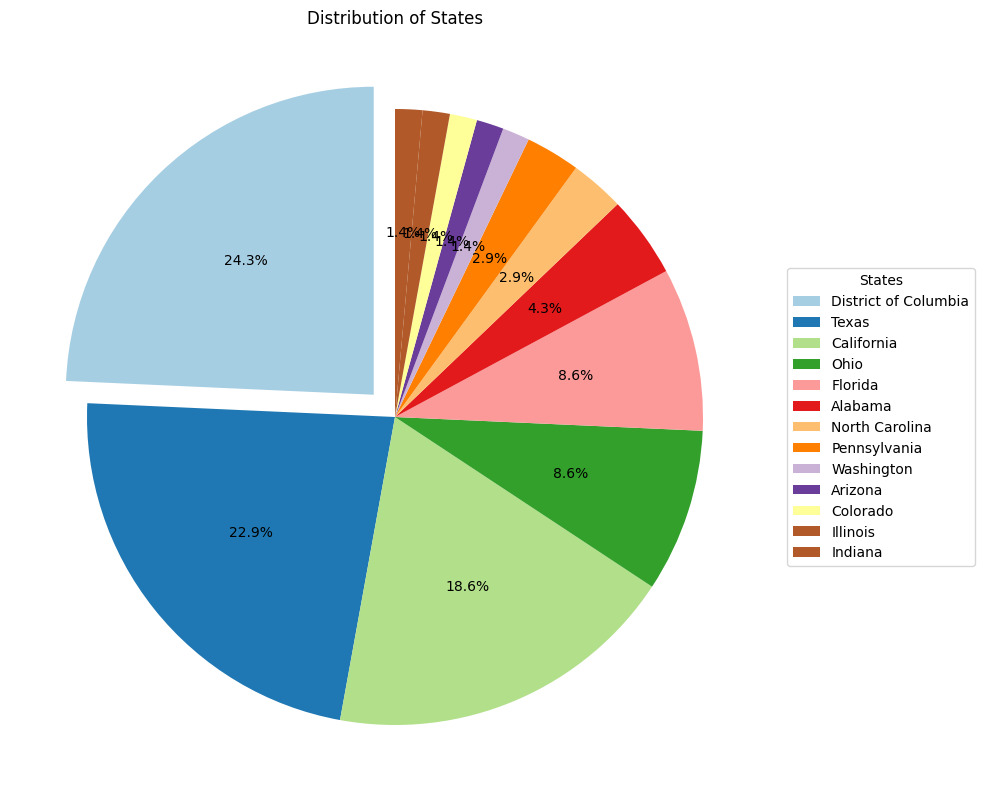

In [45]:
# Pie chart - Distribution of Province/State

# Count the occurrences of each category
state_counts = merged_data['Province/State'].value_counts()

# Choose colors for each state
colors = plt.cm.Paired(range(len(state_counts)))

# Explode a slice for emphasis (e.g., the first state)
explode = [0.1 if i == 0 else 0 for i in range(len(state_counts))]

# Plotting a pie chart
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(state_counts, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Create legend with labels and values
plt.legend(state_counts.index, title="States", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of States')

# Set state names as labels in the pie chart
for autotext, label in zip(autotexts, state_counts.index):
    autotext.set_label(label)

# Show the plot
plt.show()


#### Human readable dataset after all transformations should be printed at the end of your notebook.

In [46]:
# Flatfile dataset after transformation
cities_df.head()

,City,City ASCII,lat,lon,Country,ISO2,ISO3,Admin Name,Capital,Population,ID
0,Tokyo,Tokyo,0.203358,2.093137,Japan,JP,JPN,Tōkyō,primary,"37,977,000",1392685764
1,Jakarta,Jakarta,-1.579454,1.615418,Indonesia,ID,IDN,Jakarta,primary,"34,540,000",1360771077
2,Delhi,Delhi,-0.095720,1.184704,India,IN,IND,Delhi,admin,"29,617,000",1356872604
3,Mumbai,Mumbai,-0.508119,1.120760,India,IN,IND,Mahārāshtra,admin,"23,355,000",1356226629
4,Manila,Manila,-0.693900,1.821040,Philippines,PH,PHL,Manila,primary,"23,088,000",1608618140


In [47]:
# Web dataset after transformation
web_df.head()

,City,Province/State,Country,North-South,East-West,Coordinates,lat,lon
0,Adak,Alaska,United States,Northern,Western,51°53′N 176°39′W,50,-175
1,Honolulu,Hawaii,United States,Northern,Western,21°19′N 157°50′W,20,-160
2,Barrow,Alaska,United States,Northern,Western,71°18′N 156°46′W,70,-155
3,Hilo,Hawaii,United States,Northern,Western,19°42′N 155°05′W,20,-155
4,Anchorage,Alaska,United States,Northern,Western,61°13′N 149°54′W,60,-150


In [48]:
# API data after transformation
final_df.head()

,City,Country,Lat,Lon,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%)
0,New York,US,41.8334,-70.8328,50.49,47.86,47.08,52.97,1019,56
1,Los Angeles,US,41.8334,-70.8328,74.55,72.79,67.01,81.59,1018,23
2,Chicago,US,41.8334,-70.8328,42.21,40.86,40.32,43.38,1026,59
3,Houston,US,41.8334,-70.8328,57.63,57.33,56.08,59.14,1016,90
4,Phoenix,US,41.8334,-70.8328,76.06,74.12,73.26,78.62,1013,16


In [49]:
merged_data.head()

,City,Province/State,Country,North-South,East-West,Coordinates,lat,lon,City,City ASCII,...,City,Country,Lat,Lon,Temperature (F),Feels Like (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%)
0,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
1,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
2,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
3,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51
4,San Francisco,California,United States,Northern,Western,37°47′N 122°25′W,40,-120,San Francisco,San Francisco,...,San Francisco,US,41.8334,-70.8328,65.55,64.2,61.32,71.28,1020,51


## Summary

In completing this project, I gained valuable insights into the process of data wrangling, cleaning, and visualization. The project involved working with multiple datasets, which required a systematic approach to ensure data integrity and consistency. I began by importing the datasets and performed initial exploratory data analysis to understand the structure and content of the data. This step was crucial in identifying potential data quality issues and areas that needed cleansing.

One of the key tasks was handling missing values, which required careful consideration of the best approach for each dataset. In some cases, interpolation techniques were used to impute missing values, while in others, rows with missing data were removed to maintain data integrity. Additionally, I addressed duplicate entries to ensure that the final dataset was free from redundancy.

Ethical considerations played a significant role in this project. Ensuring the privacy and confidentiality of individuals associated with the data was paramount. It was crucial to anonymize and aggregate data appropriately, especially when working with location-based information. Additionally, transparency in data handling procedures and compliance with relevant privacy regulations were central to maintaining ethical standards.

Throughout the project, I learned the importance of thorough documentation. Clear and concise comments in the code aided in understanding and replicating the steps taken. Additionally, visualizations played a critical role in summarizing the insights derived from the data. Creating meaningful and informative visualizations required careful selection of visualization types and customization to effectively communicate the findings.

In conclusion, this project provided a comprehensive hands-on experience in data wrangling and cleansing, with a focus on geographical data. It underscored the ethical responsibilities associated with handling sensitive information. Through this process, I enhanced my proficiency in Python programming, data manipulation techniques, and data visualization. The project also reinforced the significance of methodical and transparent data handling practices in generating meaningful insights.
